In [1]:
#Cargamos las librerias necesarias:
import pandas as pd
import datetime as dt
import numpy as np
import warnings # nobody likes warnings

import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

import sys
sys.path.append(r"C:\Users\FernandoSanz-Extreme\OneDrive - AMCHOR INVESTMENT STRATEGIES SGIIC, S.A\Escritorio\Ironhack\DATA_OCT24_MAD")
from functions import *

In [2]:
data = pd.read_csv("king_ country_ houses_aa.csv.zip")
df = data.copy()

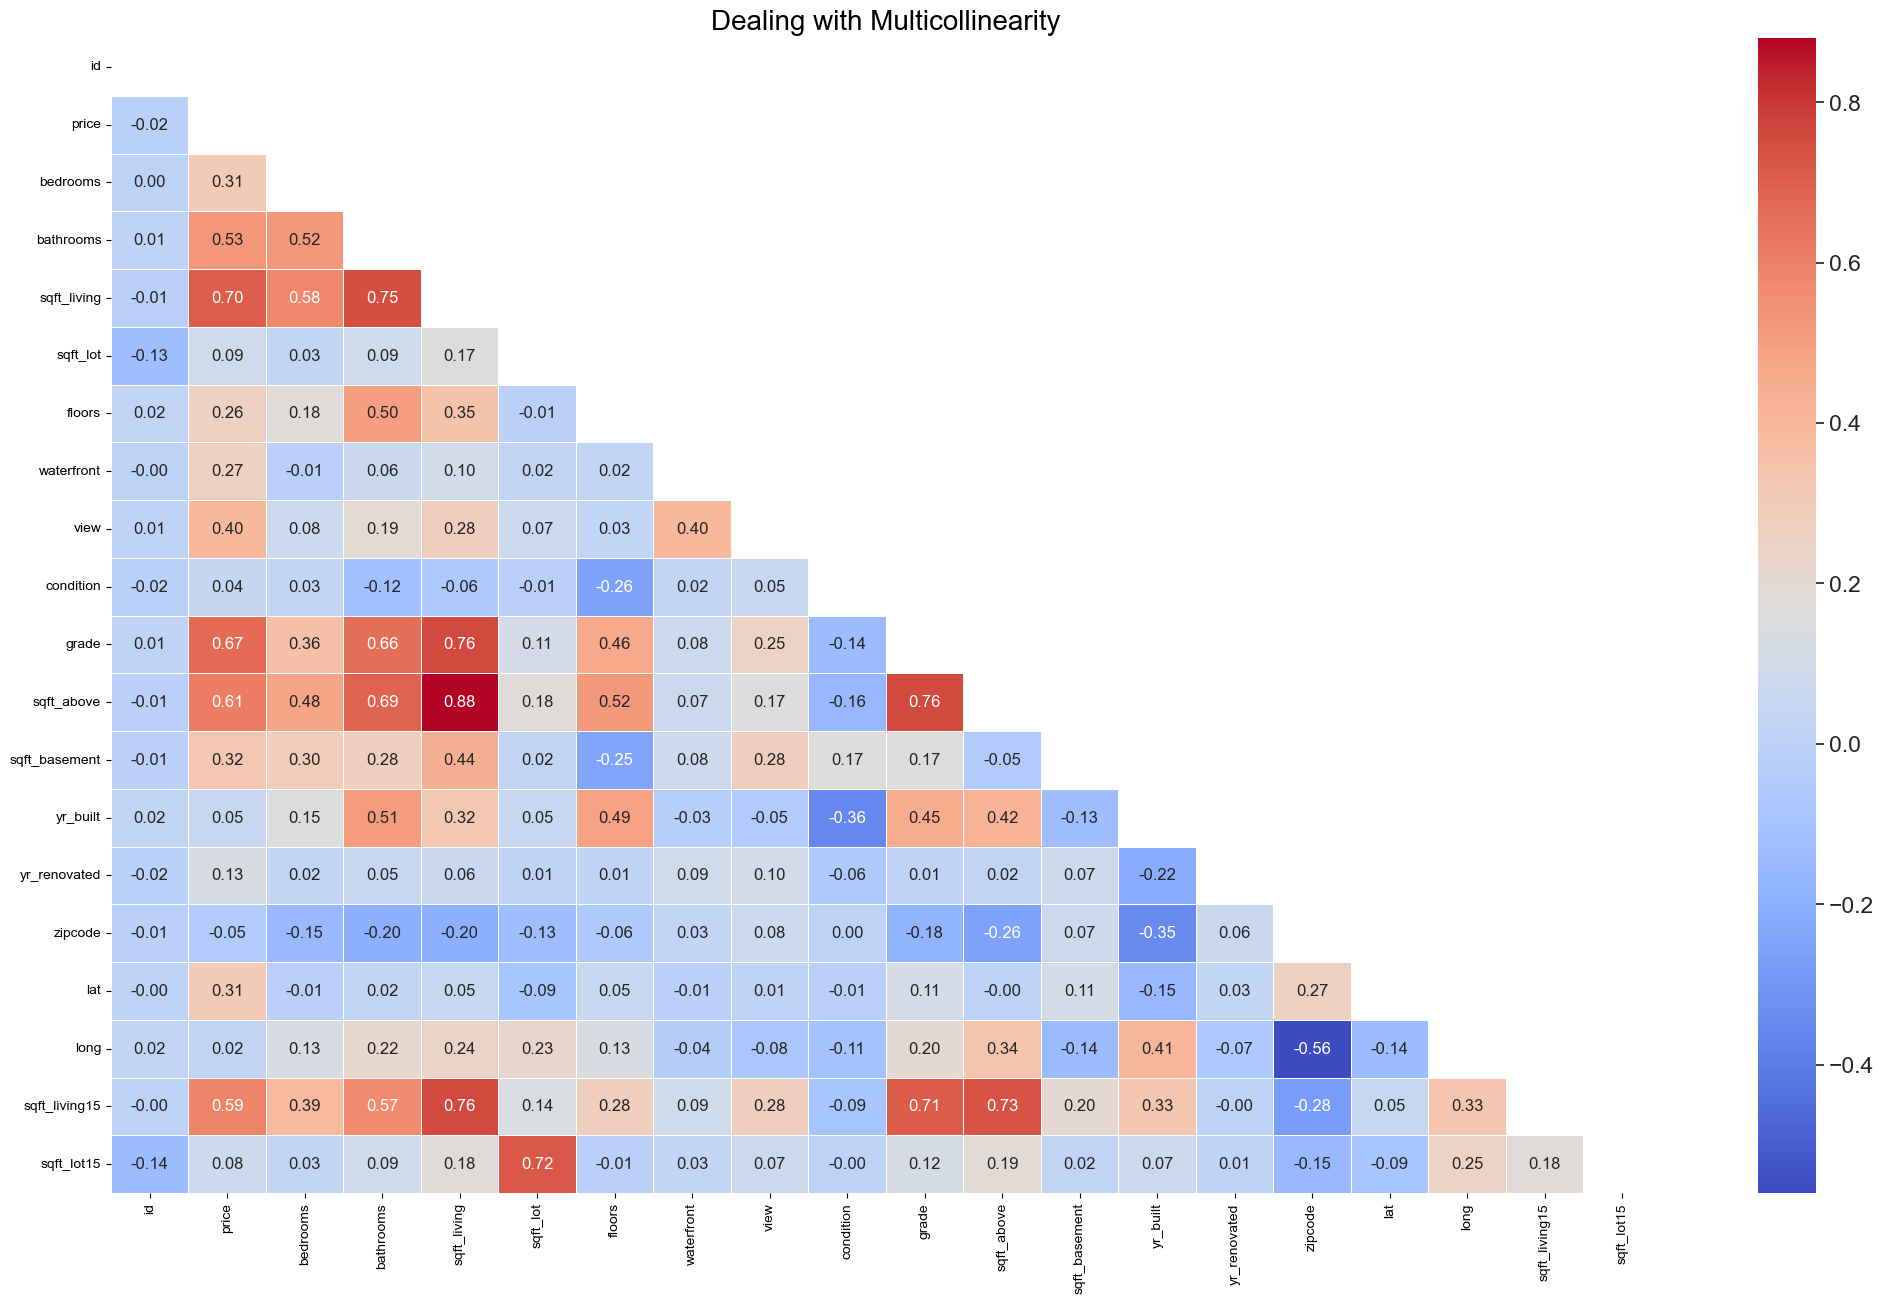

In [3]:
correlation_matrix(df)

In [4]:
#distribution_check(df)

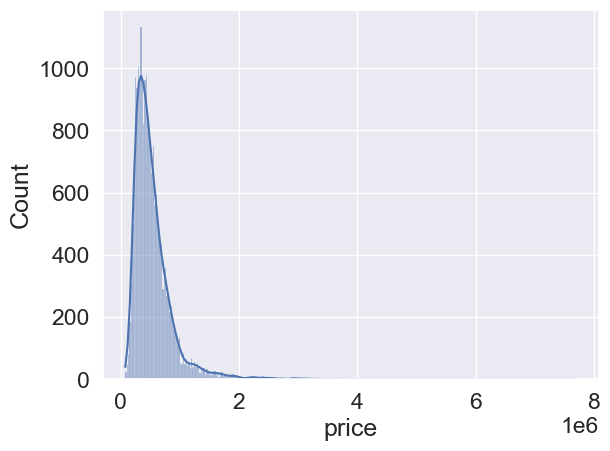

In [5]:
sns.histplot(data=df.price, kde=True);

In [6]:
df = df.set_index("id")
df.drop(columns=["sqft_above"], inplace=True)
df["date"] = df["date"].str[0:8].apply(lambda x: dt.datetime.strptime(x,"%Y%m%d").toordinal())

In [7]:
#check_outliers(df)

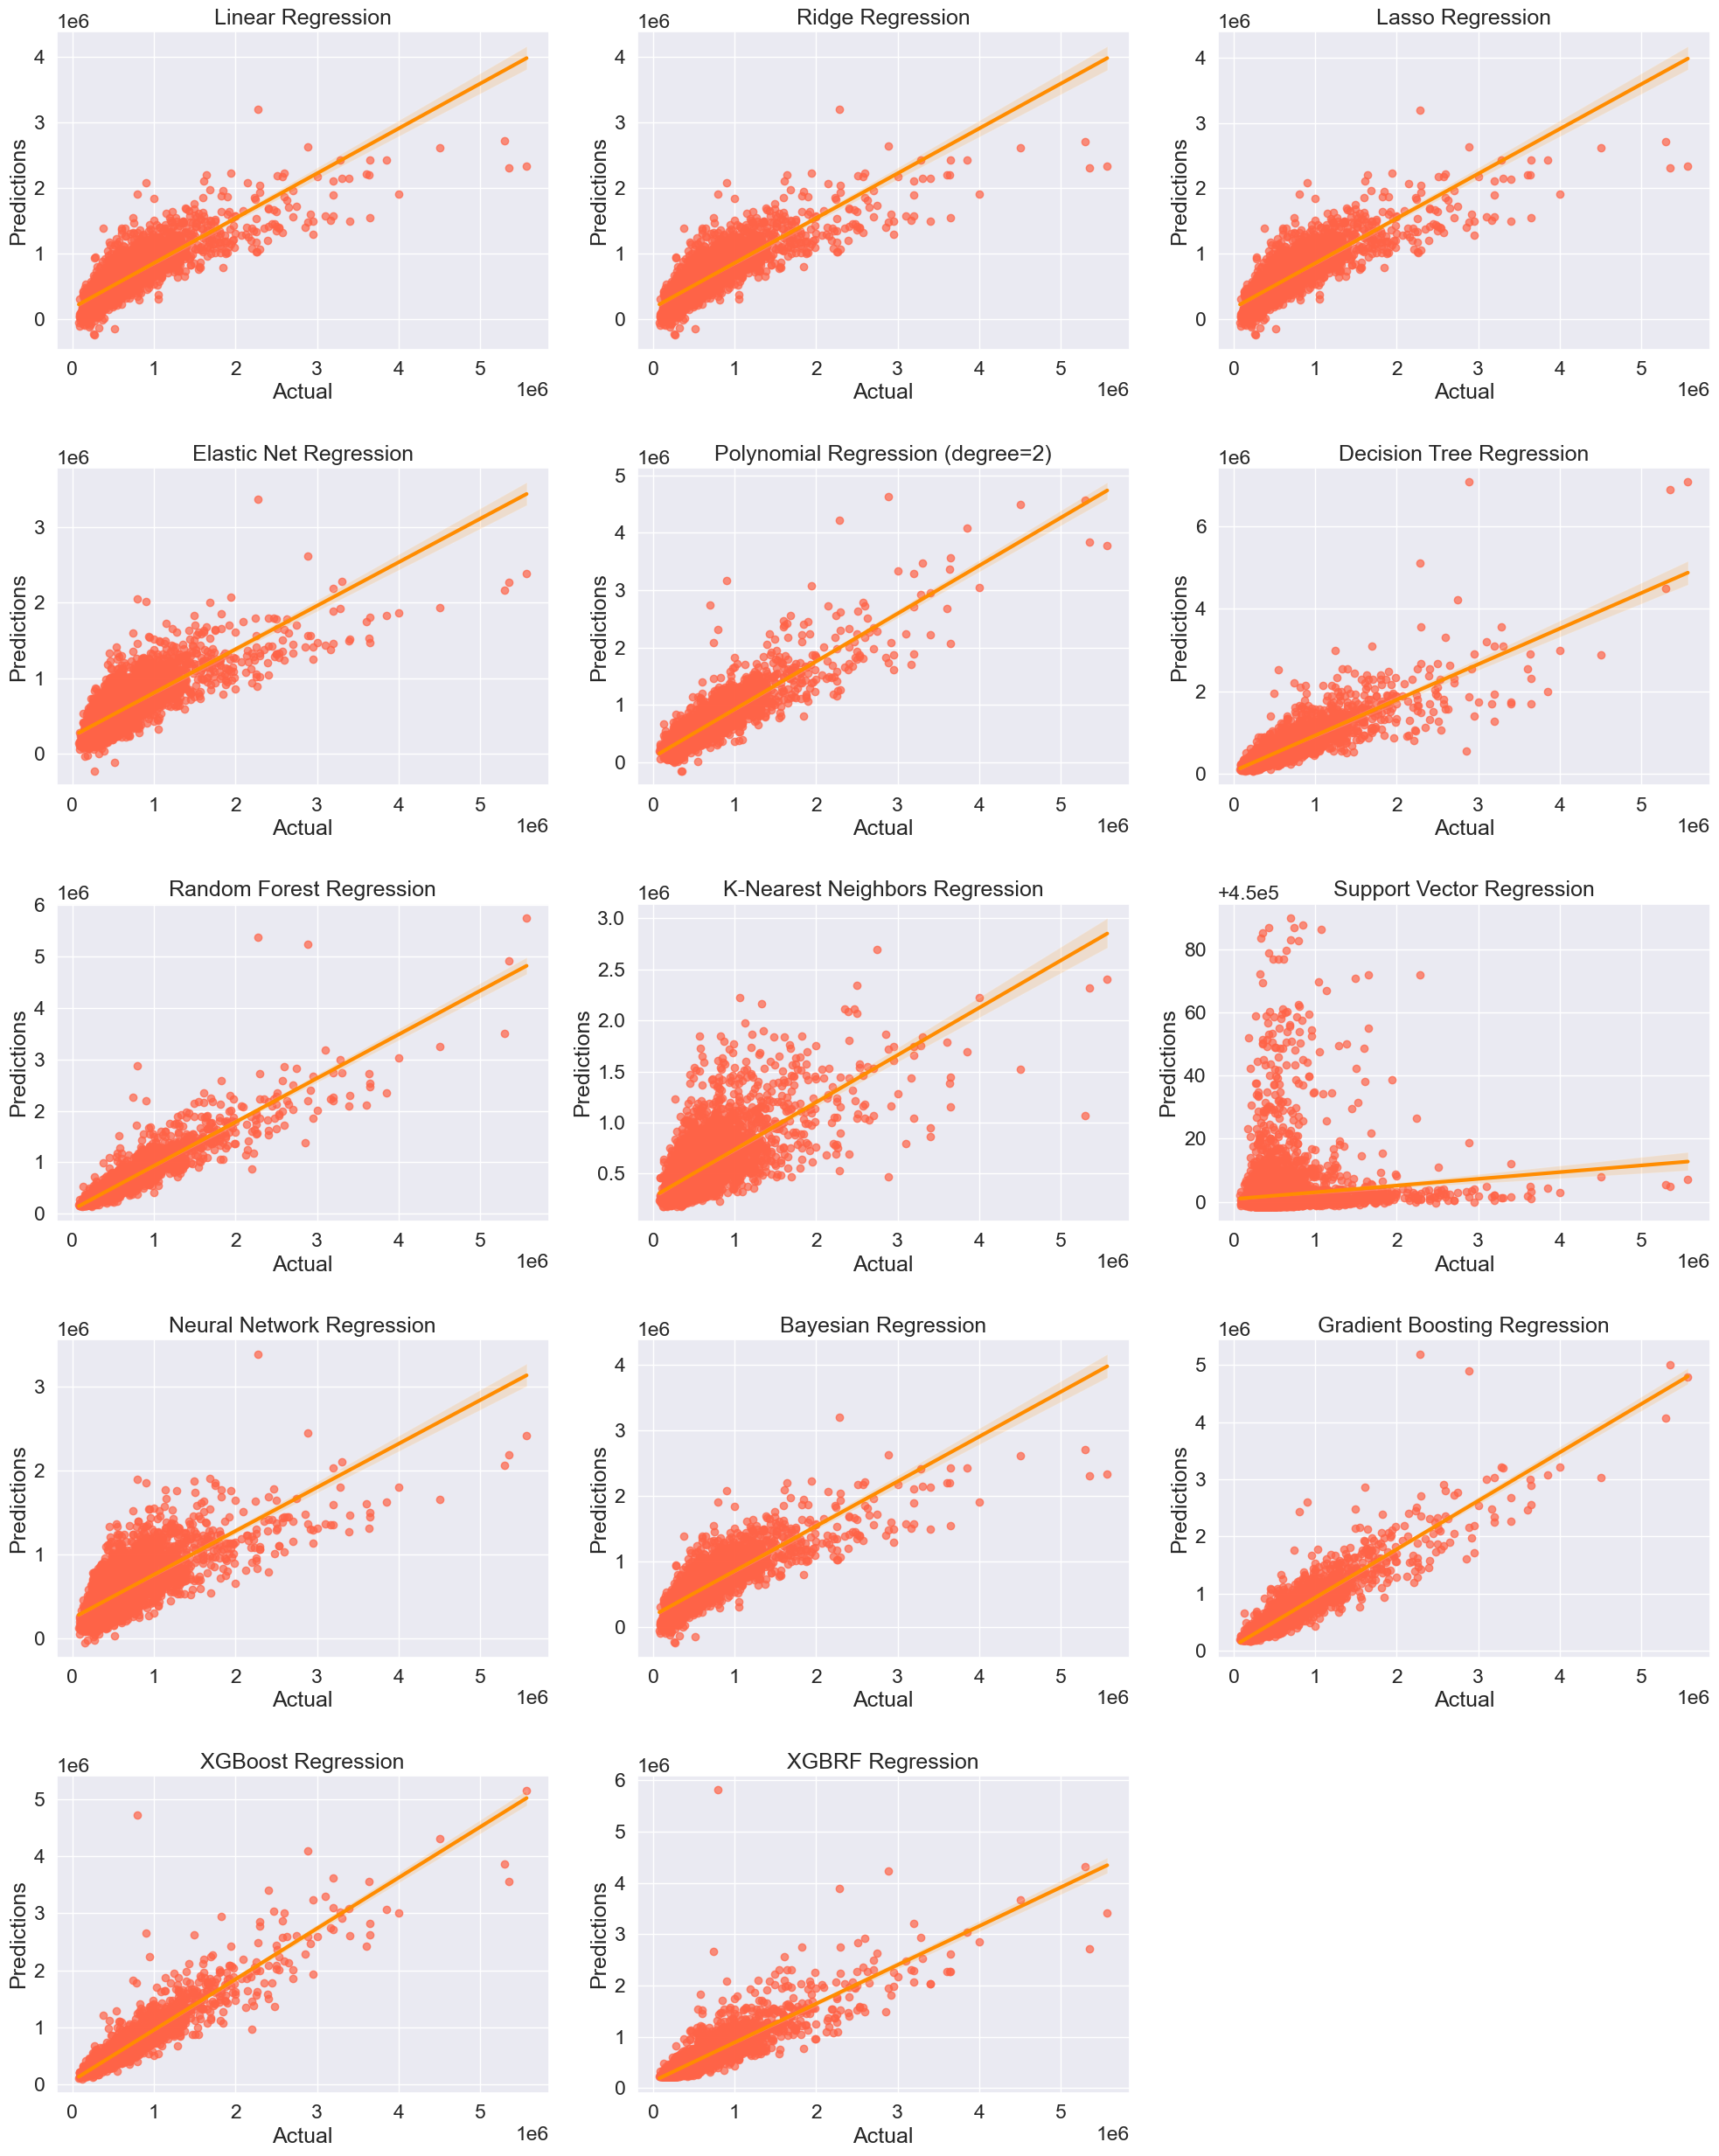

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7005,207924.9949,4.323280e+10,127181.9958
Ridge Regression,0.7004,207957.9979,4.324653e+10,127177.6053
Lasso Regression,0.7005,207926.1667,4.323329e+10,127181.6039
Elastic Net Regression,0.6115,236829.6364,5.608828e+10,148877.5473
Polynomial Regression (degree=2),0.8058,167448.2859,2.803893e+10,102545.2325
Decision Tree Regression,0.7289,197829.1580,3.913638e+10,102789.2320
Random Forest Regression,0.8543,145035.3874,2.103526e+10,73130.4046
K-Nearest Neighbors Regression,0.4814,273611.0778,7.486302e+10,165269.8363
Support Vector Regression,-0.0636,391845.8232,1.535431e+11,226854.9521


In [8]:
#Sin limpiar, solo hemos quitado sqft_above (correlación de 0.88), pasando el ID al index y date a ordinal
base_model = evaluate_regresion_model(df, "price").T
base_model

# Let's Clean

In [9]:
df2 = df.copy()
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,735654,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,735374,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,735652,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,735407,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007


In [10]:
#Metemos en la variable drops los index de las casas con 0 habitaciones y 0 baños
drops = df2[(df2["bedrooms"] == 0) & (df2["bathrooms"] == 0)].index
#Los dropeamos
df2.drop(index=drops, inplace=True)
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,735654,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,735374,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,735652,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,735407,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007


In [11]:
drops=df2[df2["bedrooms"] == 33].index
#Los dropeamos
df2.drop(index=drops, inplace=True)
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,735654,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,735374,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,735652,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,735407,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007


In [12]:
evaluate_regresion_model(df2, "price", graphs=False).T

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7034,206688.5095,4.272014e+10,126068.9417
Ridge Regression,0.7034,206712.8477,4.273020e+10,126042.2863
Lasso Regression,0.7034,206689.2972,4.272047e+10,126067.8812
Elastic Net Regression,0.6187,234376.3202,5.493226e+10,145328.3470
Polynomial Regression (degree=2),0.8351,154147.9469,2.376159e+10,100477.5573
Decision Tree Regression,0.7631,184718.5207,3.412093e+10,100182.8343
Random Forest Regression,0.8807,131089.7783,1.718453e+10,69427.4155
K-Nearest Neighbors Regression,0.4638,277924.3834,7.724196e+10,160126.6515
Support Vector Regression,-0.0620,391138.8999,1.529896e+11,224906.0811


In [13]:
df3 = df2.copy()
df3["sqft_diff_neighbors"] = df3["sqft_living"] - df3["sqft_living15"]
df3["lot_diff_neighbors"] = df3["sqft_lot"] - df2["sqft_lot15"]
df3["price"] = df3.pop("price")

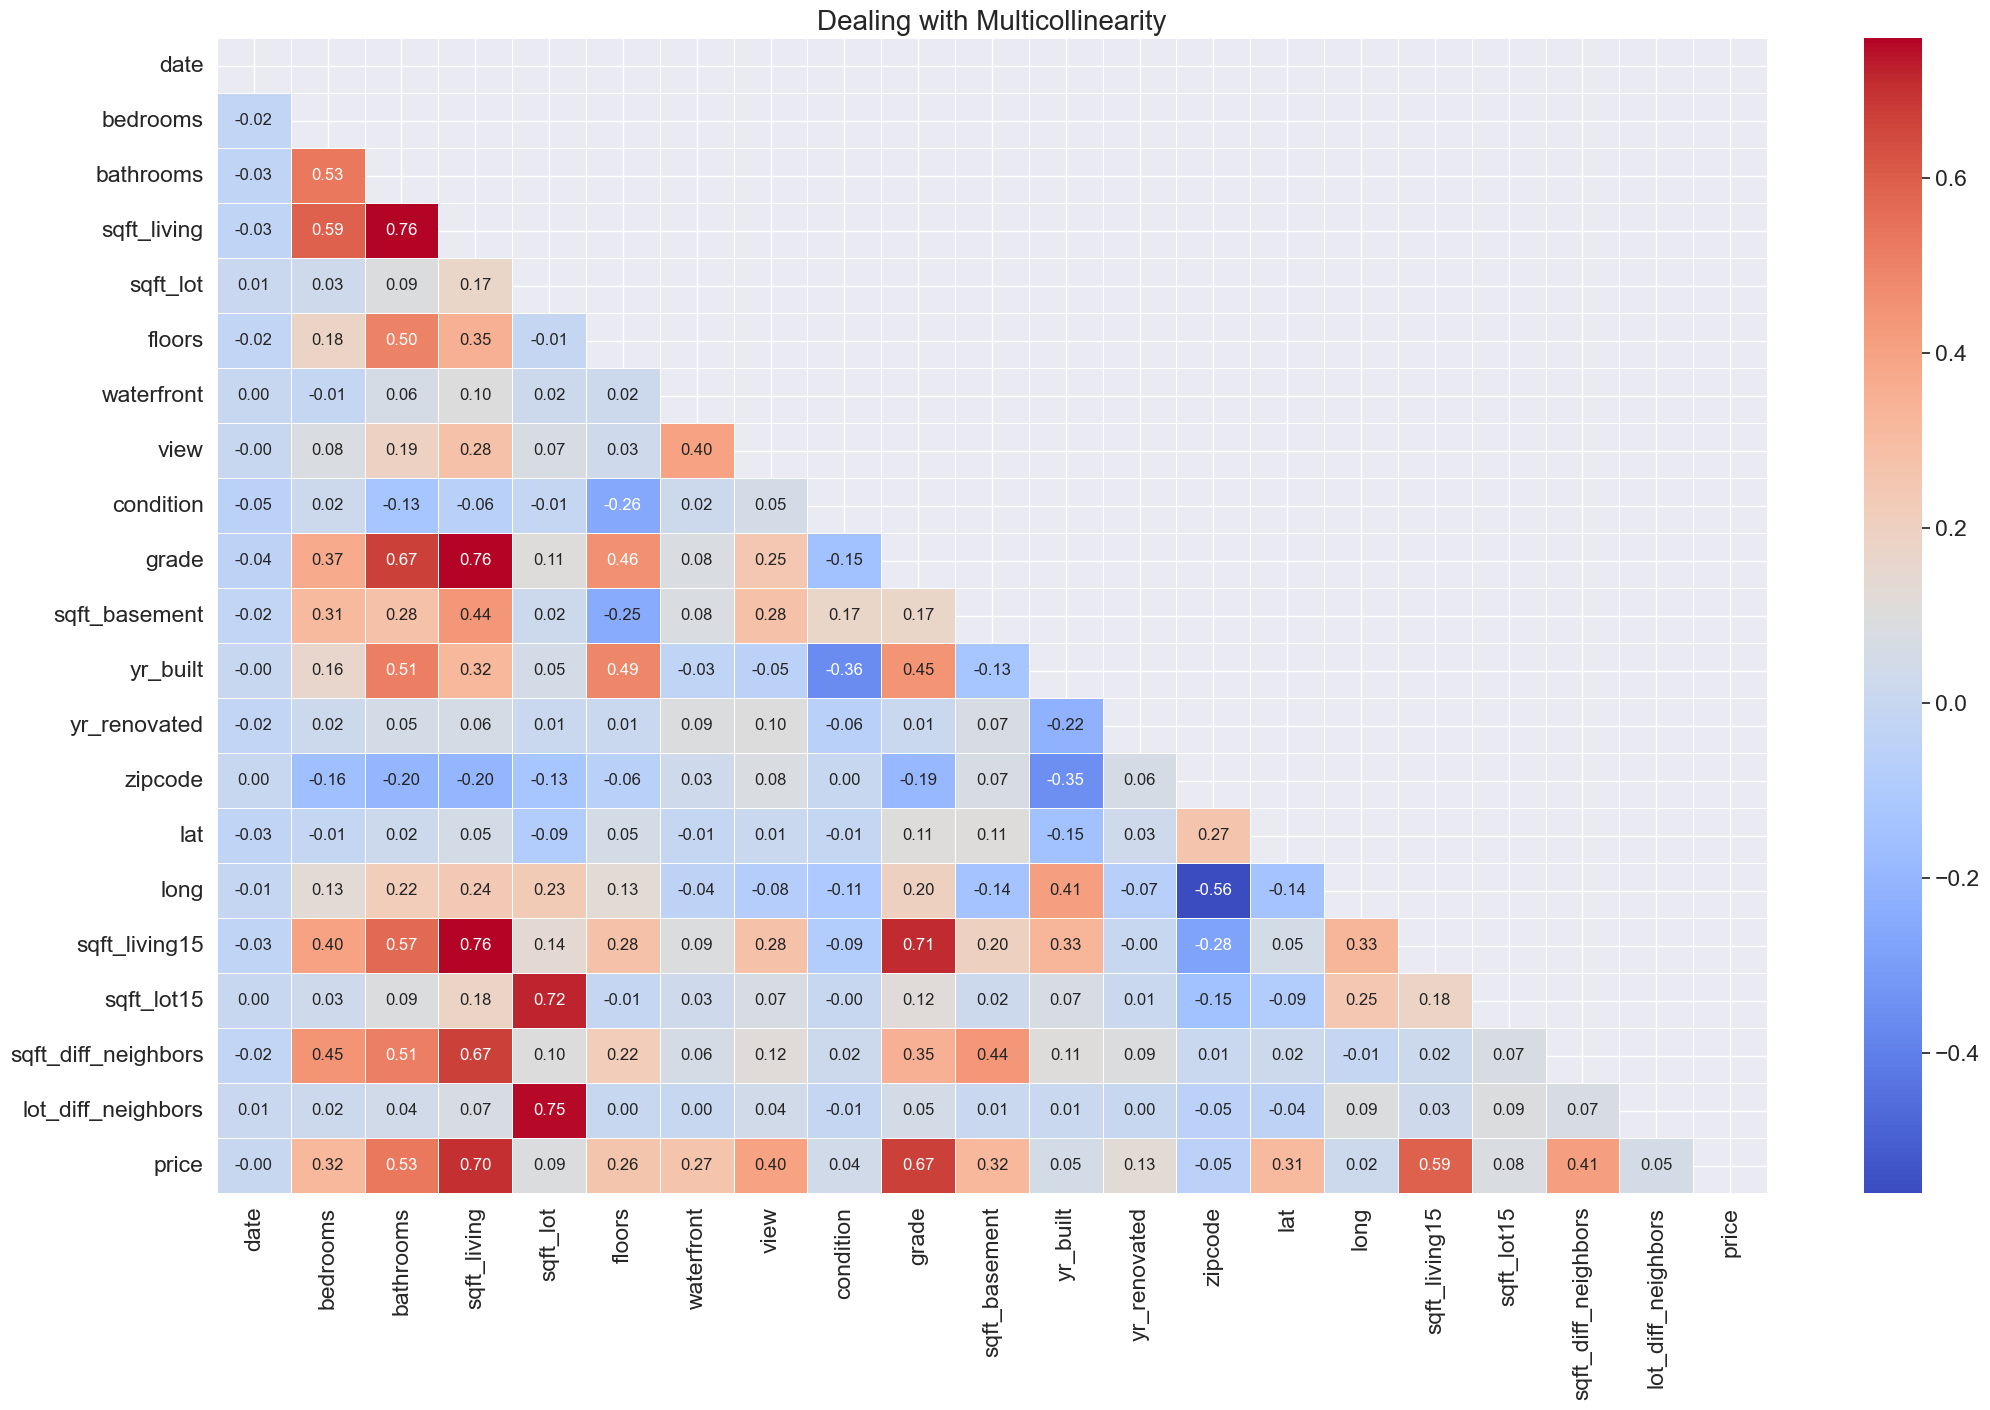

In [14]:
correlation_matrix(df3)

In [15]:
evaluate_regresion_model(df3, "price", graphs=False).T

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7034,206688.5095,4.272014e+10,126068.9417
Ridge Regression,0.7034,206712.8477,4.273020e+10,126042.2863
Lasso Regression,0.7034,206689.2972,4.272047e+10,126067.8818
Elastic Net Regression,0.6187,234376.2983,5.493225e+10,145328.3644
Polynomial Regression (degree=2),0.8345,154415.2352,2.384406e+10,100414.9171
Decision Tree Regression,0.7466,191044.9614,3.649818e+10,103832.9981
Random Forest Regression,0.8812,130792.2770,1.710662e+10,69683.4742
K-Nearest Neighbors Regression,0.4583,279357.3980,7.804056e+10,162195.9824
Support Vector Regression,-0.0620,391138.8817,1.529896e+11,224906.0598


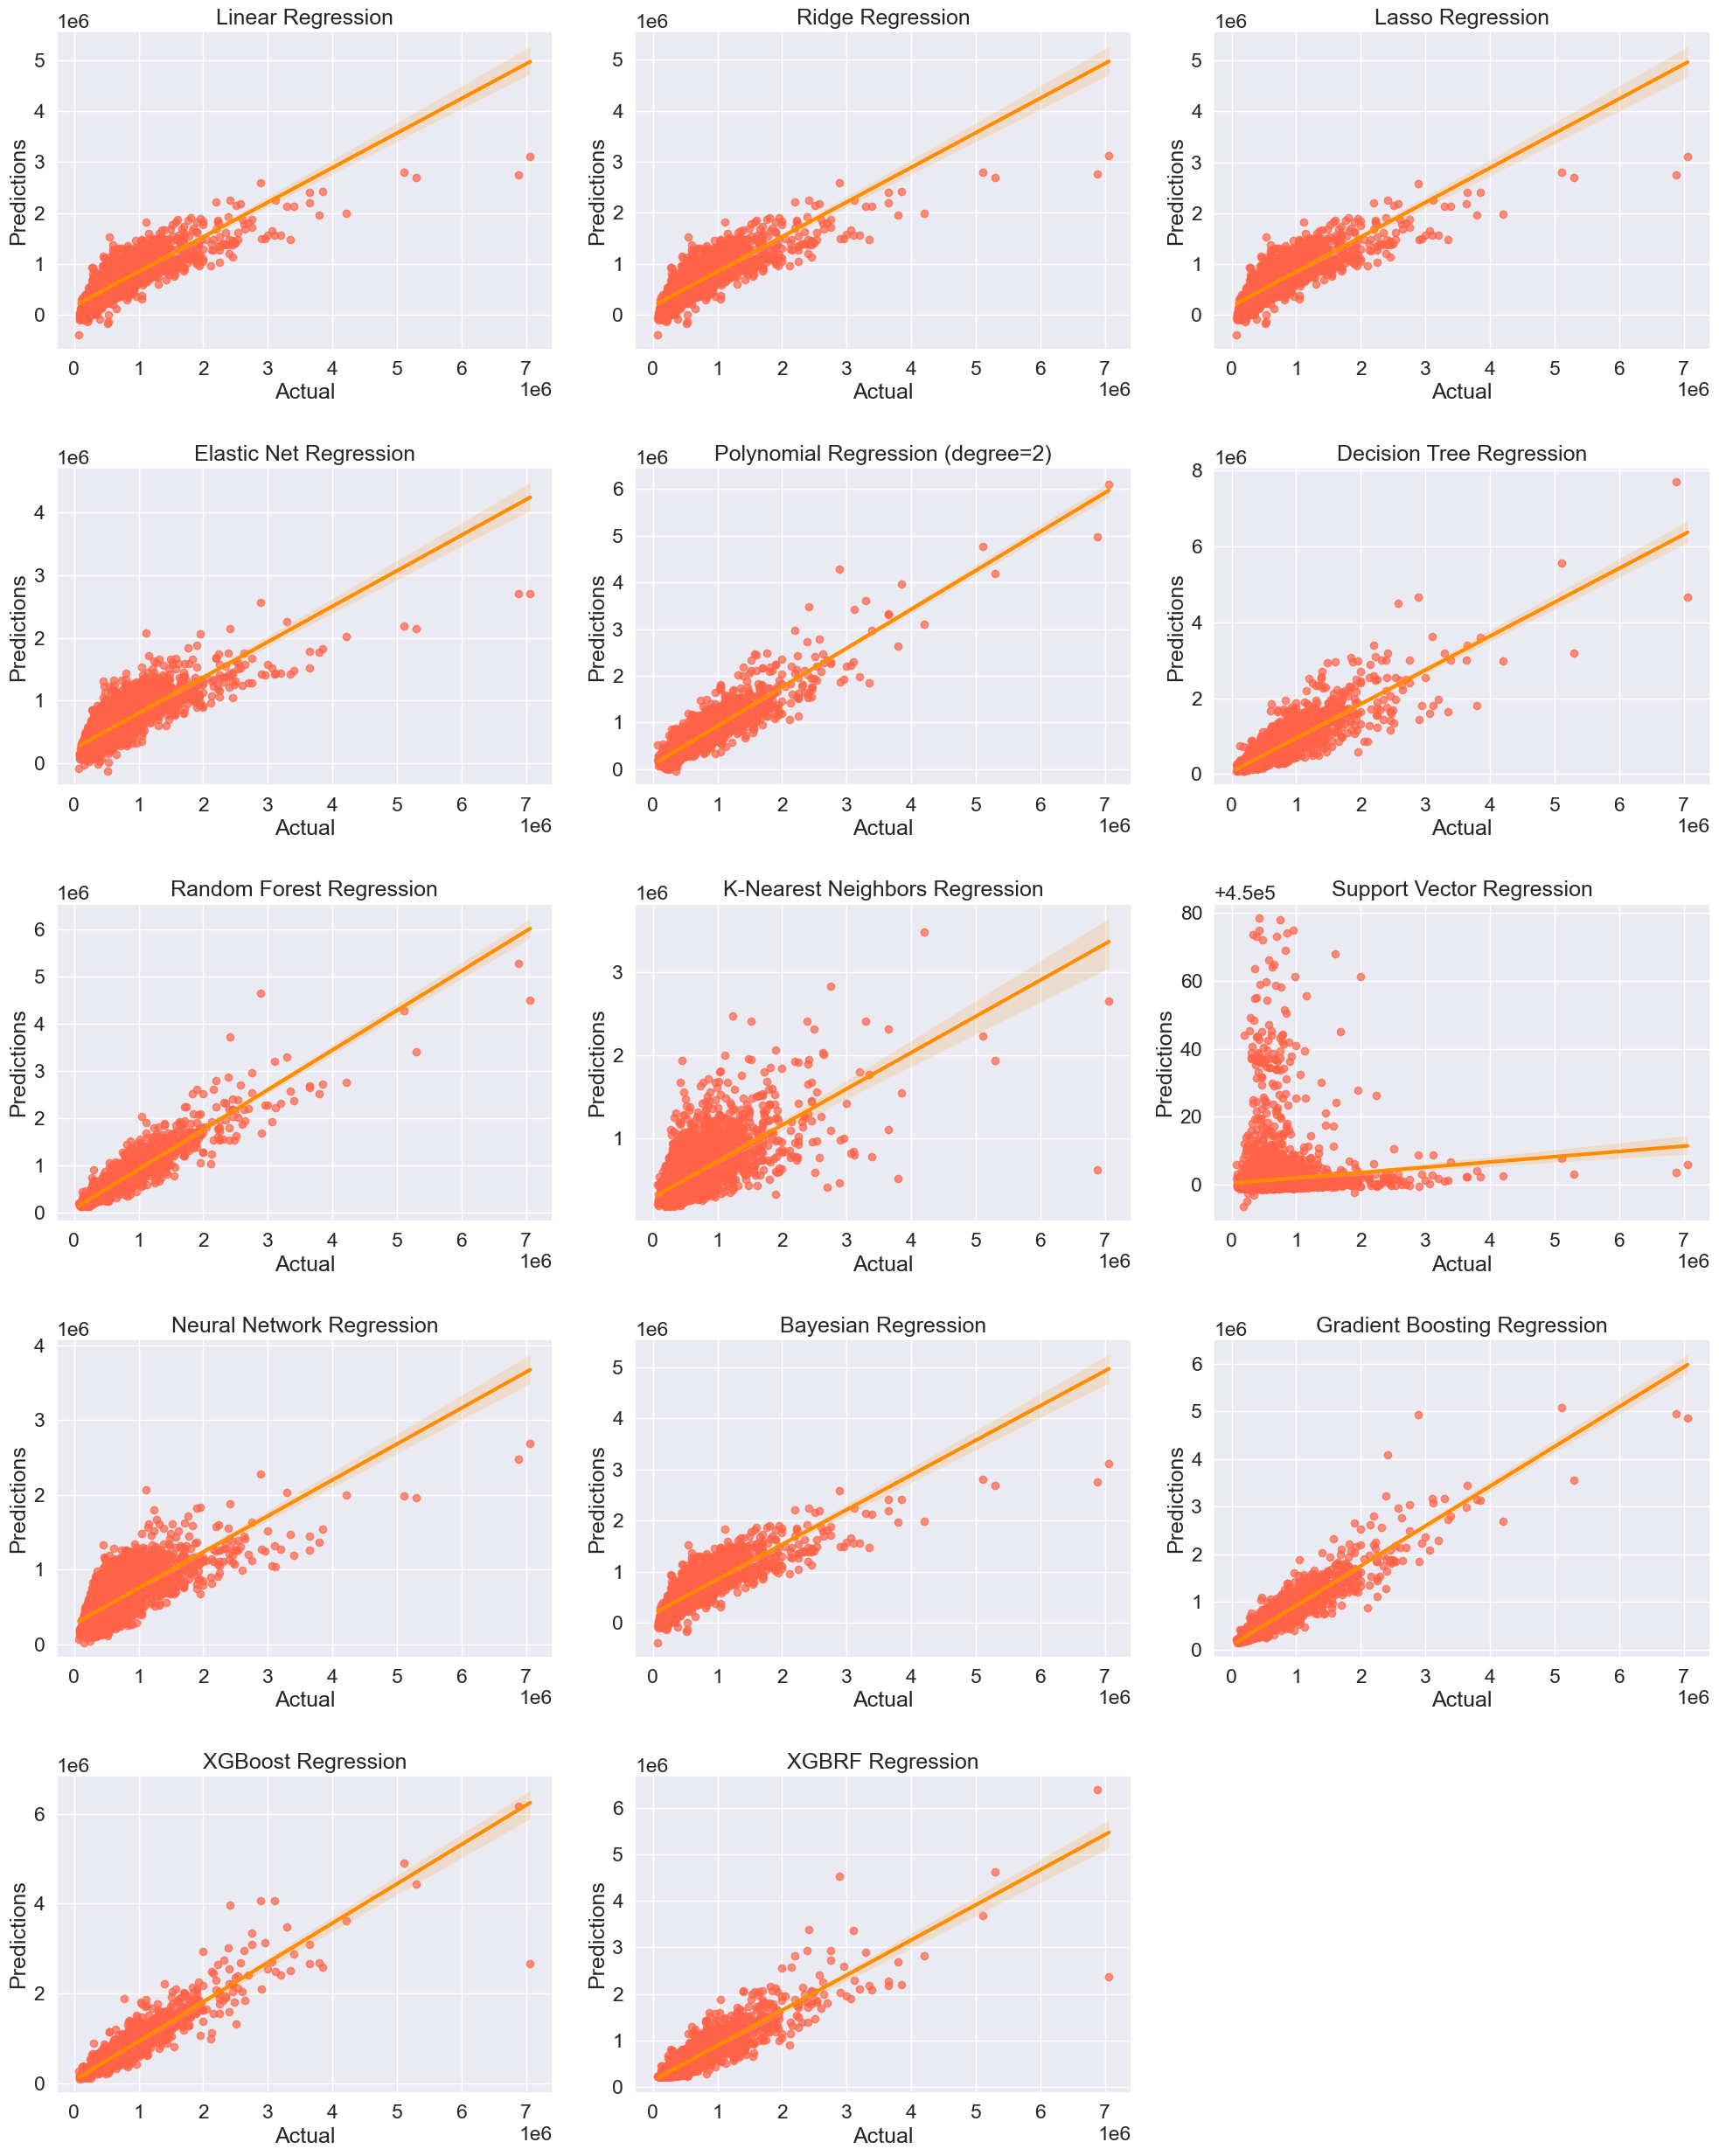

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7034,206688.5095,4.272014e+10,126068.9417
Ridge Regression,0.7034,206712.8477,4.273020e+10,126042.2863
Lasso Regression,0.7034,206689.2971,4.272047e+10,126067.8811
Elastic Net Regression,0.6187,234376.2938,5.493225e+10,145328.3168
Polynomial Regression (degree=2),0.8352,154097.7378,2.374611e+10,100342.3920
Decision Tree Regression,0.7672,183124.4271,3.353456e+10,101968.3476
Random Forest Regression,0.8802,131347.2873,1.725211e+10,69944.0415
K-Nearest Neighbors Regression,0.4458,282560.2531,7.984030e+10,166188.1466
Support Vector Regression,-0.0620,391139.2091,1.529899e+11,224906.2339


In [16]:
df4 = df3.copy()
df4.drop(columns=["sqft_living15", "sqft_lot15"], inplace=True)
evaluate_regresion_model(df4, "price", graphs=True).T

----------------------Data Normalized with Standard Scaler-------------------------


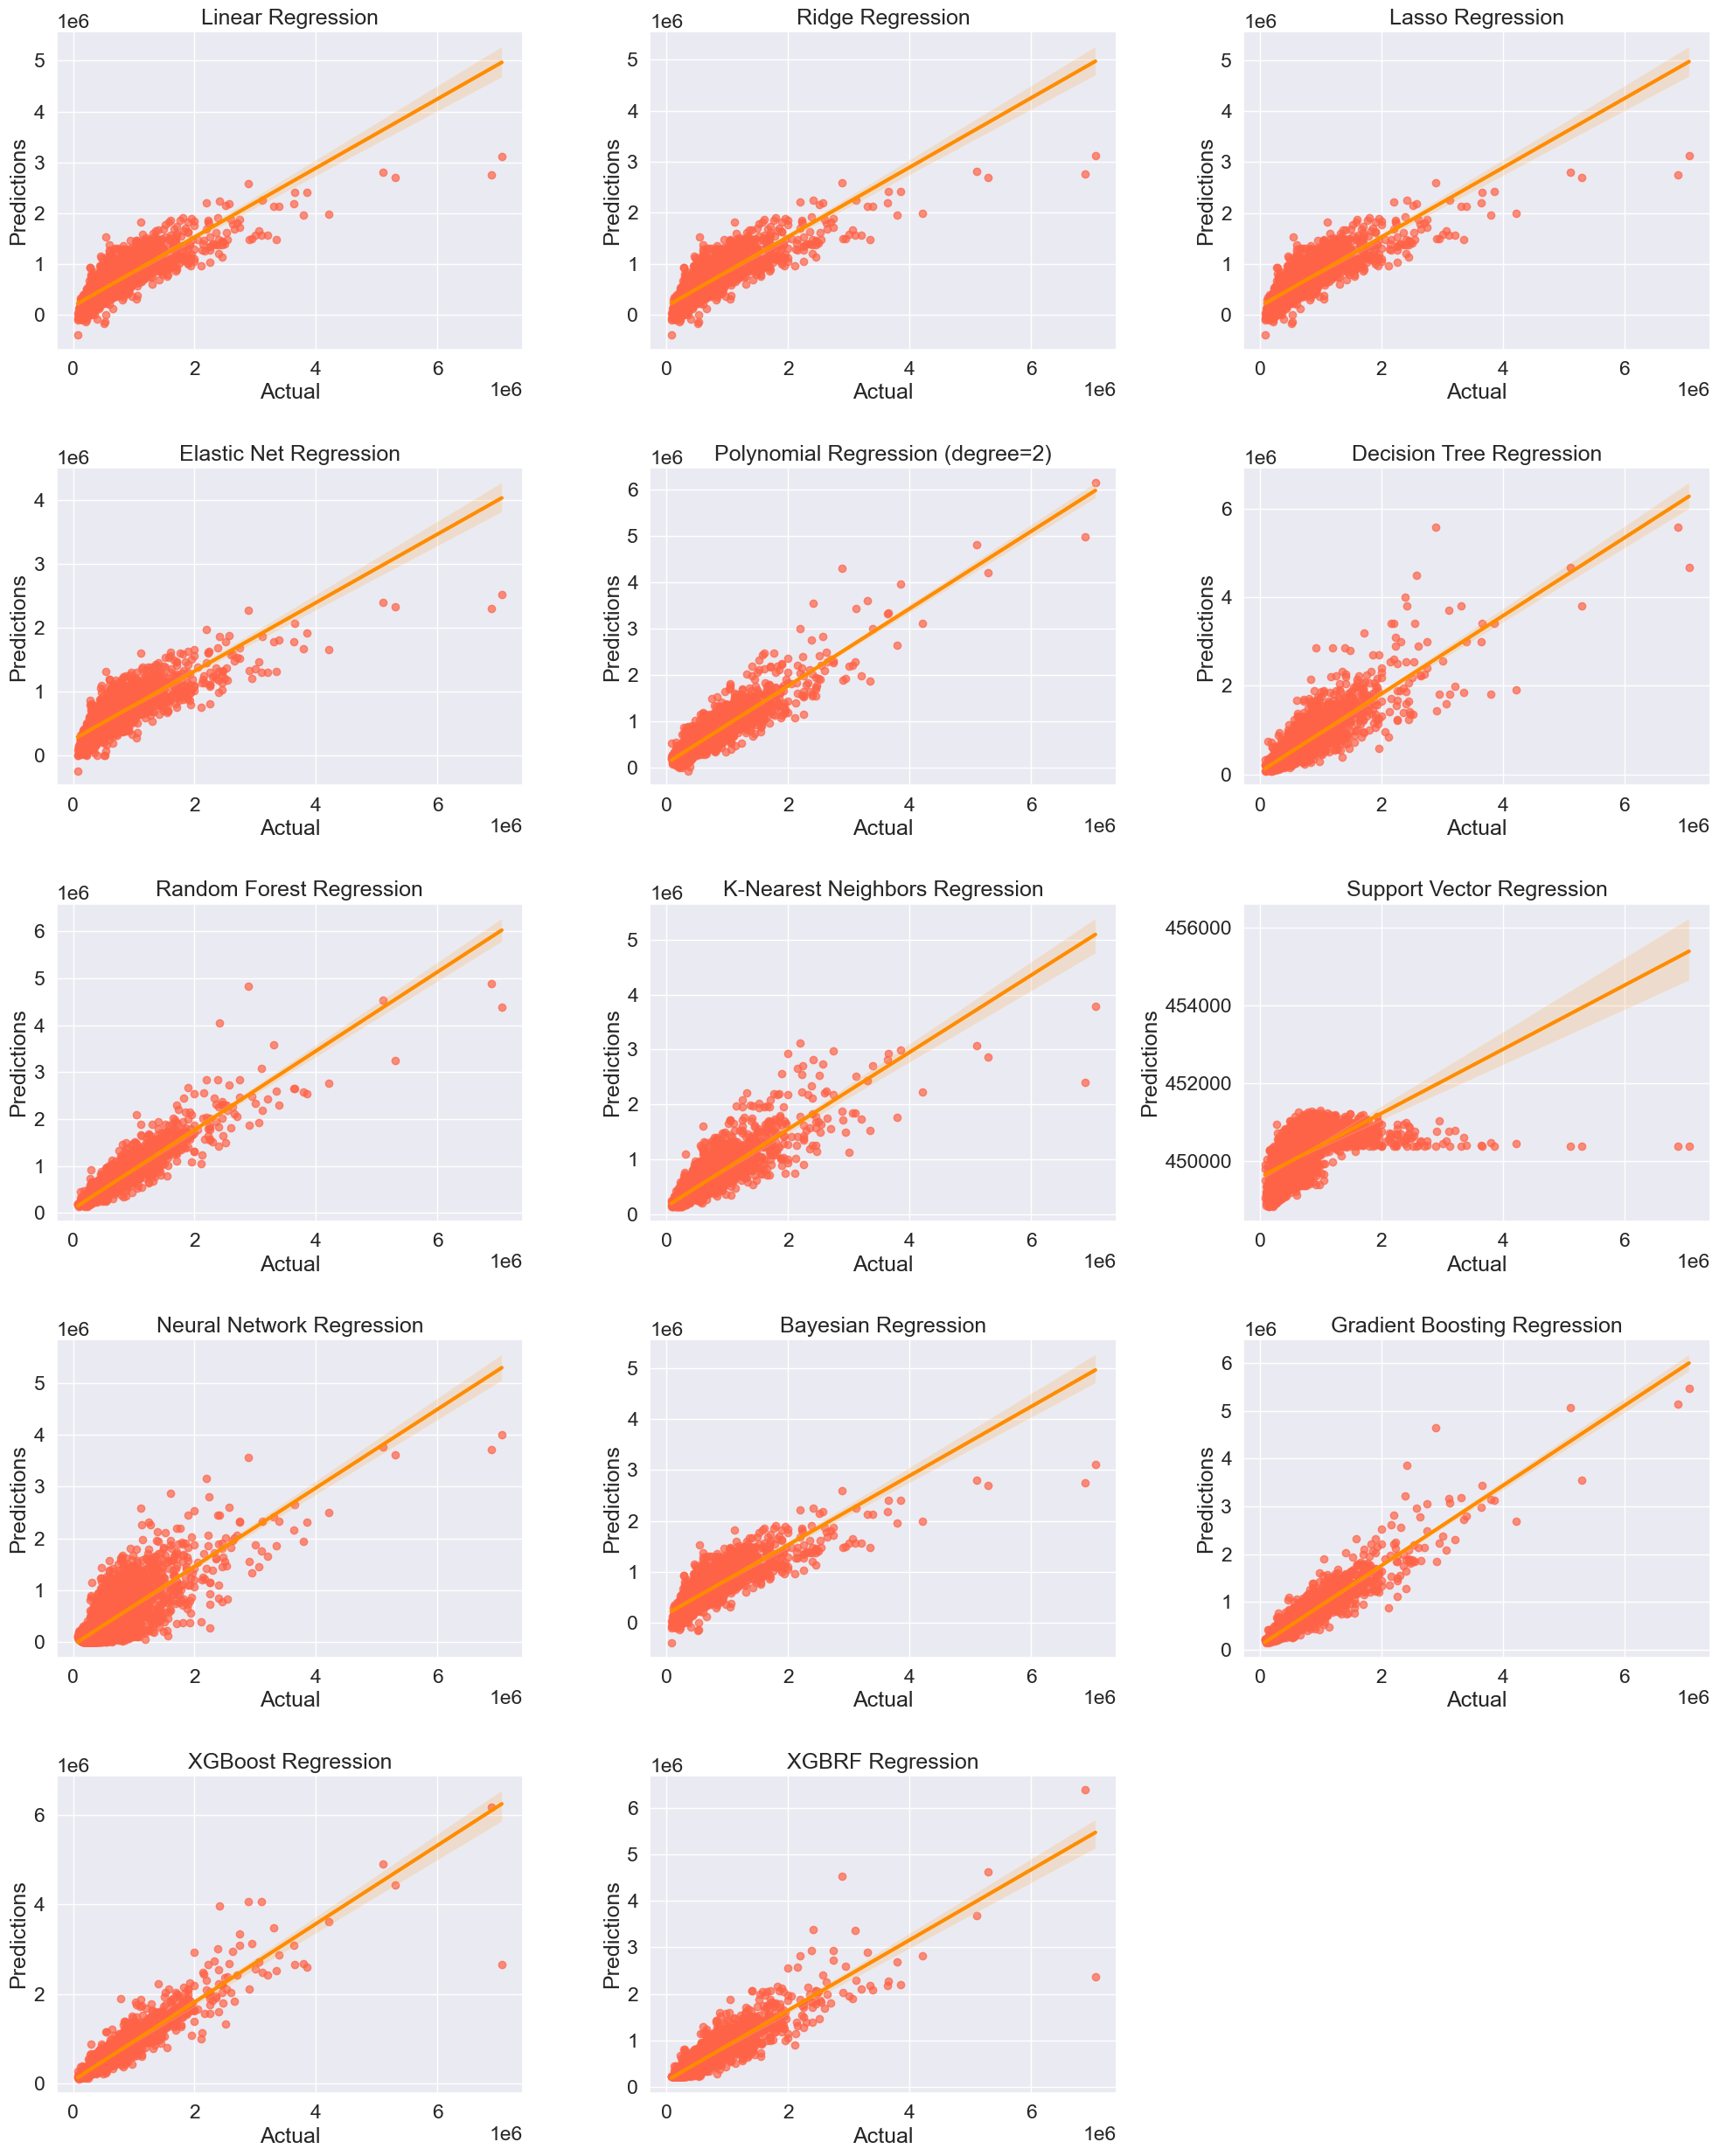

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7034,206688.5095,4.272014e+10,126068.9417
Ridge Regression,0.7034,206689.1020,4.272038e+10,126064.4791
Lasso Regression,0.7034,206688.5898,4.272017e+10,126068.1702
Elastic Net Regression,0.6506,224347.6321,5.033186e+10,125966.0456
Polynomial Regression (degree=2),0.8353,154050.4210,2.373153e+10,100213.5815
Decision Tree Regression,0.7529,188665.8231,3.559479e+10,103019.7826
Random Forest Regression,0.8766,133313.3259,1.777244e+10,69762.3950
K-Nearest Neighbors Regression,0.7564,187333.5633,3.509386e+10,97719.3004
Support Vector Regression,-0.0603,390829.5434,1.527477e+11,224550.4139


In [19]:
evaluate_regresion_model(df4, "price", graphs=True, stand=True).T

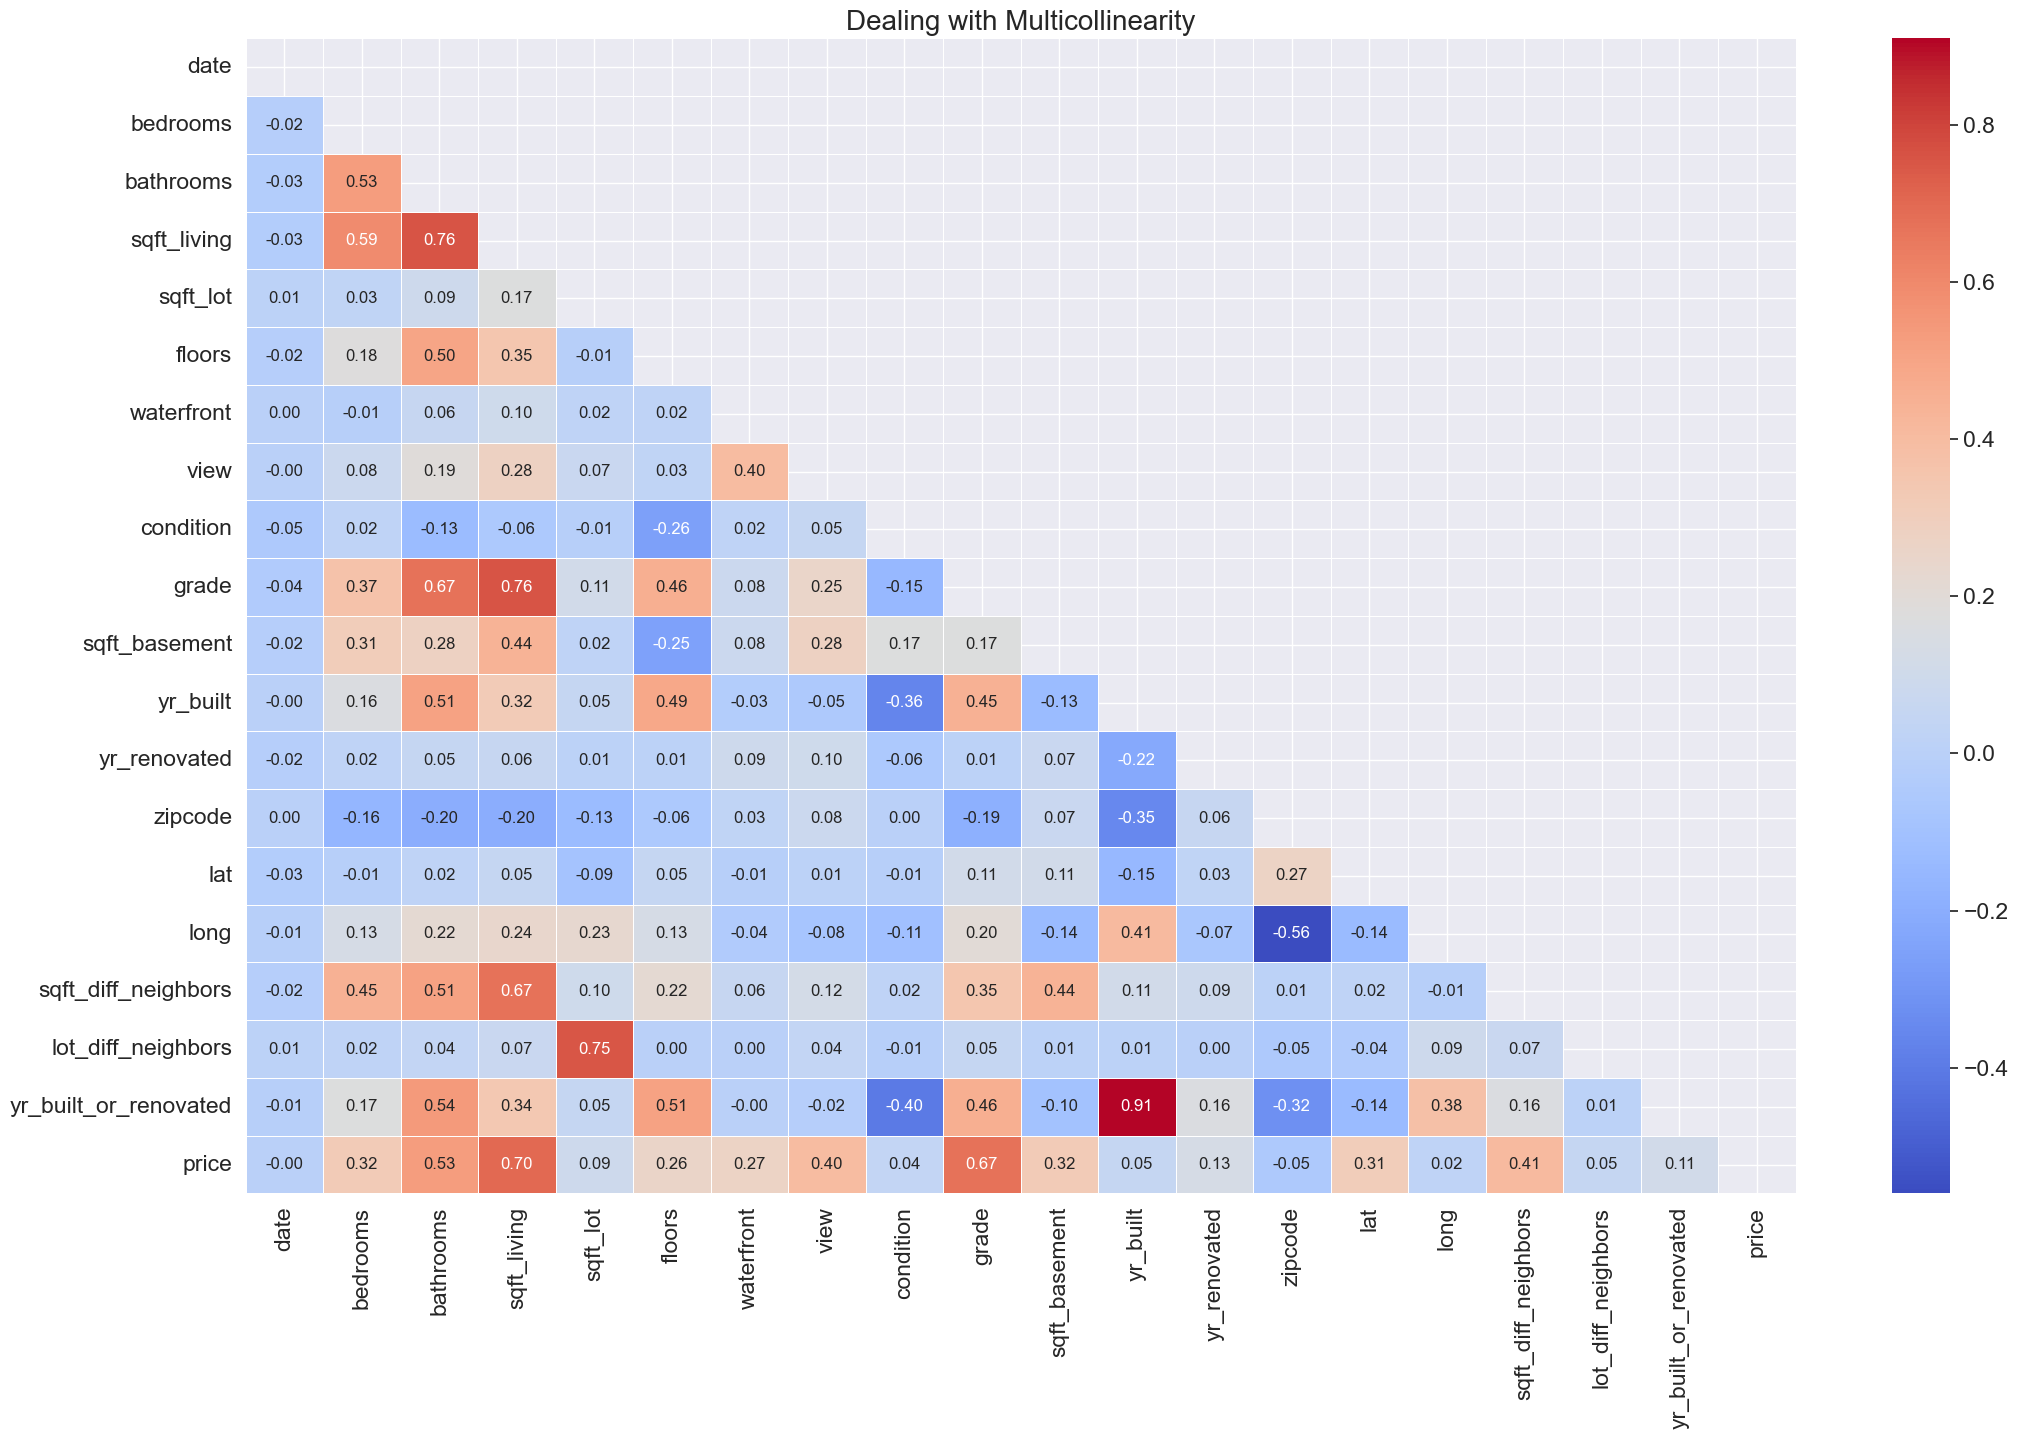

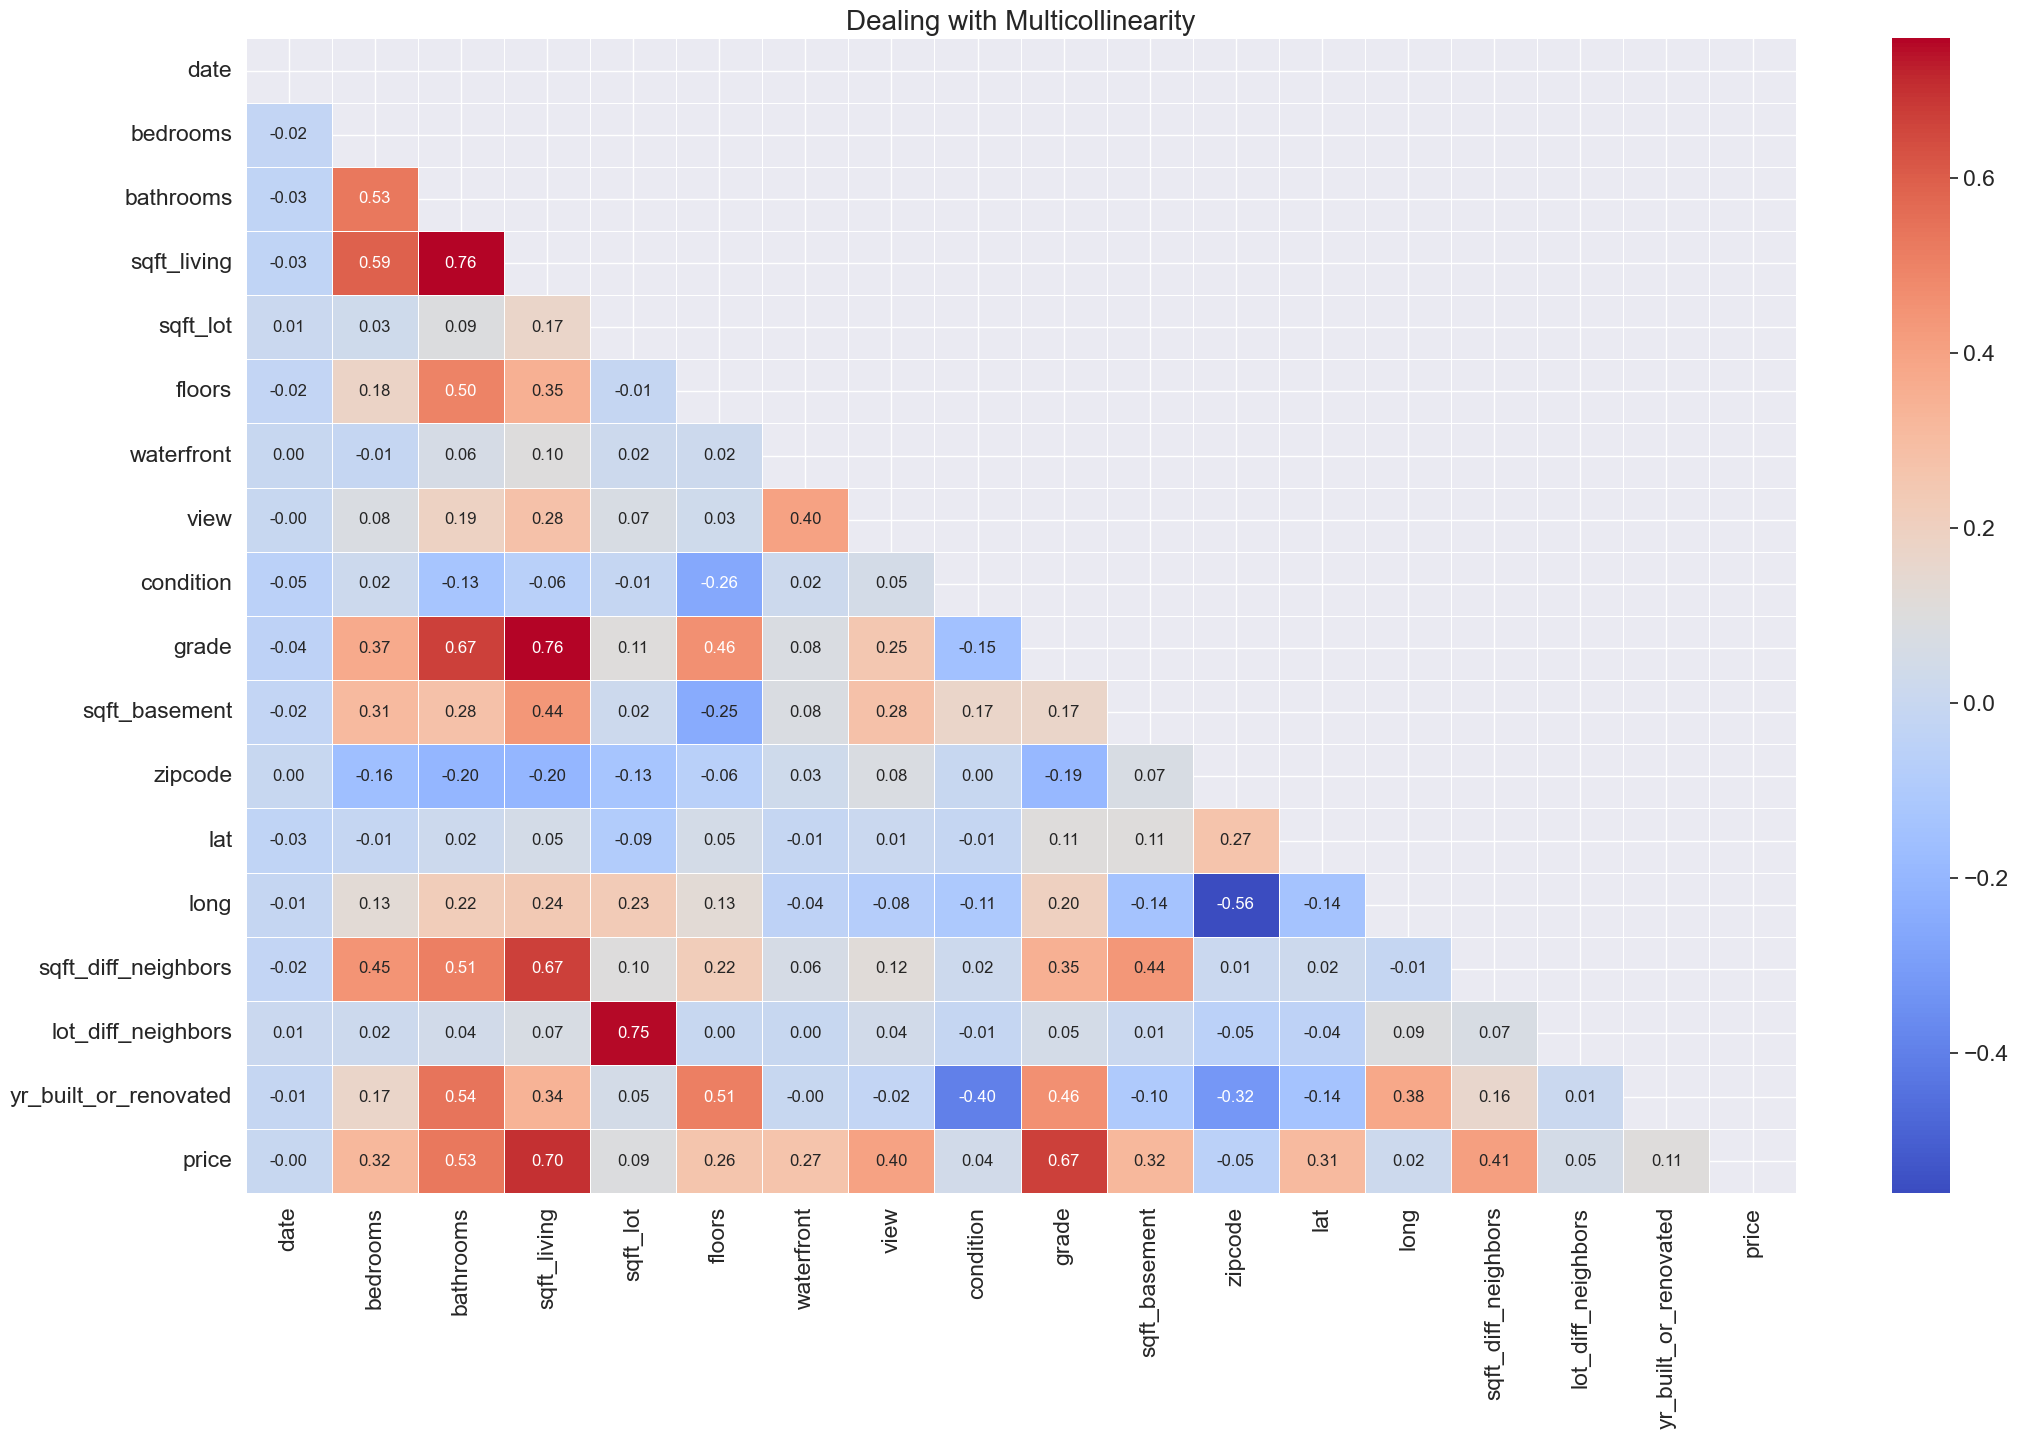

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.6941,209936.4886,4.407333e+10,128155.5695
Ridge Regression,0.6940,209958.8826,4.408273e+10,128129.2970
Lasso Regression,0.6941,209937.1760,4.407362e+10,128154.5970
Elastic Net Regression,0.6054,238413.0595,5.684079e+10,147753.0998
Polynomial Regression (degree=2),0.8273,157715.2194,2.487409e+10,102769.4983
Decision Tree Regression,0.7568,187172.7589,3.503364e+10,102728.8432
Random Forest Regression,0.8741,134690.1849,1.814145e+10,69892.7763
K-Nearest Neighbors Regression,0.4412,283719.9945,8.049704e+10,166896.2313
Support Vector Regression,-0.0620,391139.2060,1.529899e+11,224906.2318


In [18]:
df5 = df4.copy()
df5["yr_built_or_renovated"] = df5.apply(lambda row: row["yr_built"] if row["yr_renovated"] == 0 else row["yr_renovated"], axis=1)
df5["price"] = df5.pop("price")
correlation_matrix(df5)
df5.drop(columns=["yr_built","yr_renovated"], inplace=True)
correlation_matrix(df5)
evaluate_regresion_model(df5, "price", graphs=False).T